In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import cv2

In [3]:
from numpy.linalg import inv

In [4]:
cv2.__version__

'4.10.0'

In [5]:
%matplotlib inline

In [6]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [7]:
Type = 'DICT_5X5_100'

In [8]:
!ls ./aruco_recv/

1732873117.3103087.jpg	1732873191.7751899.jpg	1732873240.7898316.jpg
1732873143.3737335.jpg	1732873212.7103796.jpg	1732873258.1953855.jpg


https://velog.io/@k_joon_/Vision

In [9]:
k = np.array([[663.53906823,   0.,         620.95123764], 
                [  0.,         664.13958877, 353.79669005],
                [  0.,           0.,           1.        ]])

In [10]:
d = np.array([[-0.00746391,  0.06038115, -0.0001621,   0.00045486, -0.04346805]])

In [11]:
k, d

(array([[663.53906823,   0.        , 620.95123764],
        [  0.        , 664.13958877, 353.79669005],
        [  0.        ,   0.        ,   1.        ]]),
 array([[-0.00746391,  0.06038115, -0.0001621 ,  0.00045486, -0.04346805]]))

In [12]:
!ls E_ArUco/

106_0.jpg    106_270.jpg  35_0.jpg    35_270.jpg  57_0.jpg
106_135.jpg  106_315.jpg  35_135.jpg  35_315.jpg  57_1.jpg
106_180.jpg  106_45.jpg   35_180.jpg  35_45.jpg   57_2.jpg
106_225.jpg  106_90.jpg   35_225.jpg  35_90.jpg   57_3.jpg


In [13]:
#https://stackoverflow.com/questions/76802576/how-to-estimate-pose-of-single-marker-in-opencv-python-4-8-0
def my_estimatePoseSingleMarkers(corners, marker_size, mtx, distortion):
    '''
    This will estimate the rvec and tvec for each of the marker corners detected by:
       corners, ids, rejectedImgPoints = detector.detectMarkers(image)
    corners - is an array of detected corners for each detected marker in the image
    marker_size - is the size of the detected markers
    mtx - is the camera matrix
    distortion - is the camera distortion matrix
    RETURN list of rvecs, tvecs, and trash (so that it corresponds to the old estimatePoseSingleMarkers())
    '''
    marker_points = np.array([[-marker_size / 2, marker_size / 2, 0],
                              [marker_size / 2, marker_size / 2, 0],
                              [marker_size / 2, -marker_size / 2, 0],
                              [-marker_size / 2, -marker_size / 2, 0]], dtype=np.float32)
    trash = []
    rvecs = []
    tvecs = []
    for c in corners:
        nada, R, t = cv2.solvePnP(marker_points, c, mtx, distortion, False, cv2.SOLVEPNP_IPPE_SQUARE)
        rvecs.append(R)
        tvecs.append(t)
        trash.append(nada)
    return rvecs, tvecs, trash

In [14]:
def get_matrix(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    arucoDict = cv2.aruco.getPredefinedDictionary(ARUCO_DICT[Type])

    parameters =  cv2.aruco.DetectorParameters()
    detector = cv2.aruco.ArucoDetector(arucoDict, parameters)
    
    corners1, ids1, rejectedCandidates = detector.detectMarkers(gray)
    rvecs1, tvecs1, _ = my_estimatePoseSingleMarkers(corners1, 0.105, k, d)

    # arucoParams = cv2.aruco.DetectorParameters_create()

    # corners1, ids1, _ = cv2.aruco.detectMarkers(gray, arucoDict, parameters=arucoParams)
    # rvecs1, tvecs1, _ = cv2.aruco.estimatePoseSingleMarkers(corners1, 0.105, k, d)
    R, _ = cv2.Rodrigues(rvecs1[0])

    return ids1, rvecs1, R, tvecs1

In [15]:
unit_x = np.array([[1.0], [0.0], [0.0]])
unit_y = np.array([[0.0], [1.0], [0.0]])
unit_z = np.array([[0.0], [0.0], [1.0]])

[[6]] [array([[ 3.04839619],
       [-0.03684797],
       [-0.03490142]])] [[ 0.99944696 -0.02305614 -0.02396231]
 [-0.02517716 -0.99540806 -0.09235202]
 [-0.021723    0.09290425 -0.99543805]] [array([[-0.01740335],
       [-0.02334103],
       [ 0.3489504 ]])]
[[ 0.99944696 -0.02517716 -0.021723  ]] [[-0.02305614 -0.99540806  0.09290425]] [[-0.02396231 -0.09235202 -0.99543805]]


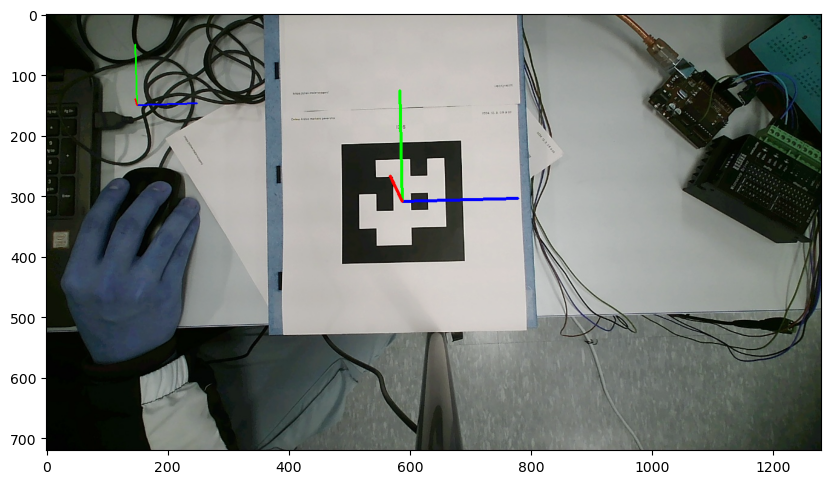

In [16]:
frame = cv2.imread('./E_ArUco/35_0.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.drawFrameAxes(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[6]] [array([[ 2.88359468],
       [ 1.04756771],
       [-0.04869828]])] [[ 0.76668949  0.64200004 -0.0048138 ]
 [ 0.63967784 -0.76451294 -0.0795753 ]
 [-0.05476756  0.05793026 -0.99681723]] [array([[-0.02522272],
       [-0.03227161],
       [ 0.35005855]])]
[[ 0.76668949  0.63967784 -0.05476756]] [[ 0.64200004 -0.76451294  0.05793026]] [[-0.0048138  -0.0795753  -0.99681723]]


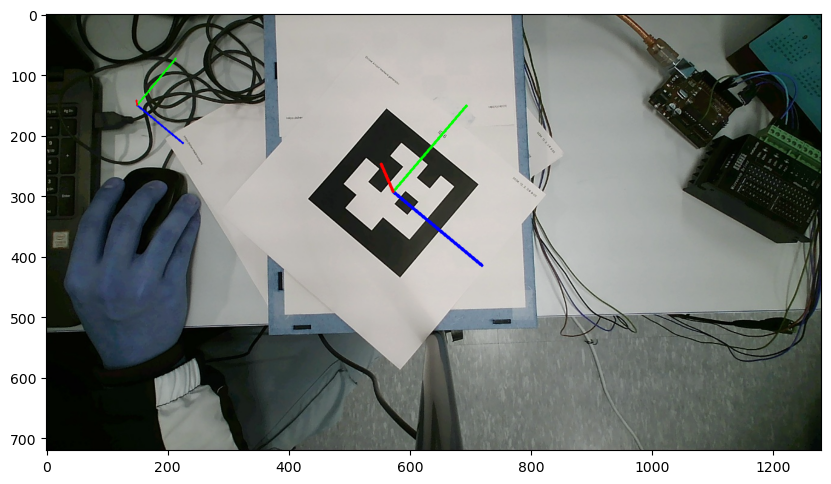

In [17]:
frame = cv2.imread('./E_ArUco/35_45.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.drawFrameAxes(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[6]] [array([[ 2.19581384],
       [ 2.20061325],
       [-0.11083224]])] [[-0.0032109   0.99959001 -0.0284517 ]
 [ 0.99739045  0.00114915 -0.07218701]
 [-0.07212472 -0.02860924 -0.99698522]] [array([[ 0.0358598 ],
       [-0.0238686 ],
       [ 0.34945465]])]
[[-0.0032109   0.99739045 -0.07212472]] [[ 0.99959001  0.00114915 -0.02860924]] [[-0.0284517  -0.07218701 -0.99698522]]


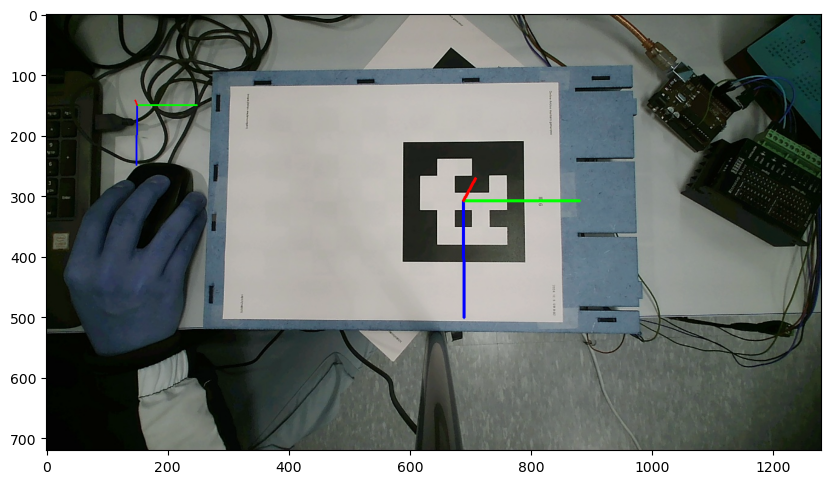

In [18]:
frame = cv2.imread('./E_ArUco/35_90.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.drawFrameAxes(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[6]] [array([[-2.9455498 ],
       [ 0.07716076],
       [-1.38049495]])] [[ 0.64002658 -0.09035124  0.76302204]
 [ 0.0047581  -0.99257703 -0.1215245 ]
 [ 0.76833804  0.08140944 -0.63484578]] [array([[ 0.00931128],
       [-0.03274145],
       [ 0.50756004]])]
[[0.64002658 0.0047581  0.76833804]] [[-0.09035124 -0.99257703  0.08140944]] [[ 0.76302204 -0.1215245  -0.63484578]]


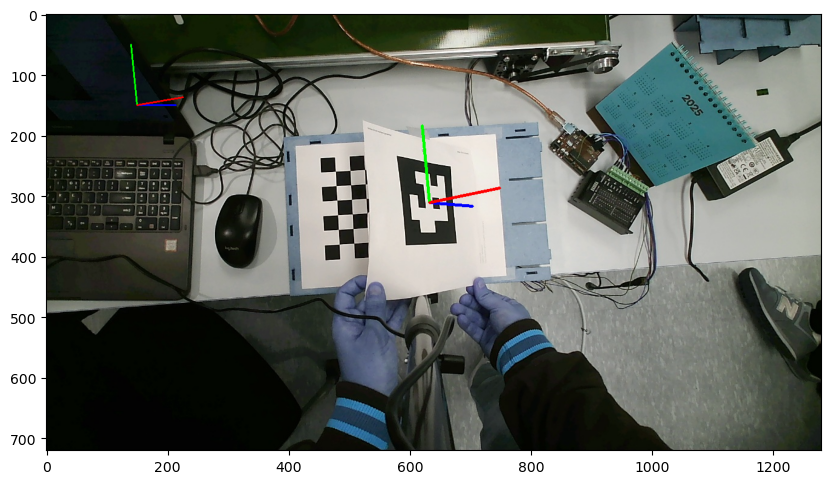

In [19]:
frame = cv2.imread('./E_ArUco/57_0.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.drawFrameAxes(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[6]] [array([[ 2.31165091],
       [-0.09134406],
       [ 0.05368477]])] [[ 0.99648506 -0.08319607  0.00979527]
 [-0.04903515 -0.67409496 -0.73701529]
 [ 0.06791972  0.73394441 -0.67580508]] [array([[-0.00185266],
       [-0.04634906],
       [ 0.51357499]])]
[[ 0.99648506 -0.04903515  0.06791972]] [[-0.08319607 -0.67409496  0.73394441]] [[ 0.00979527 -0.73701529 -0.67580508]]


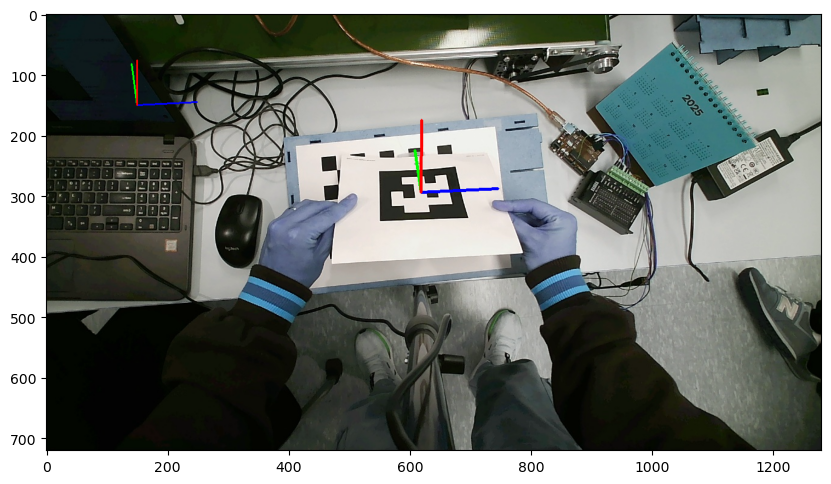

In [20]:
frame = cv2.imread('./E_ArUco/57_1.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.drawFrameAxes(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[ 6]
 [21]] [array([[ 2.94096742],
       [-0.08773375],
       [ 0.55990384]]), array([[ 2.83588878],
       [-1.22027261],
       [ 0.70012466]])] [[ 0.92877329 -0.08451094  0.36088513]
 [-0.02992657 -0.98757866 -0.1542491 ]
 [ 0.36943819  0.13246239 -0.91976581]] [array([[-2.45177594e-01],
       [-1.54978042e-04],
       [ 5.31602437e-01]]), array([[1.10065644],
       [0.21466144],
       [1.94798595]])]
[[ 0.92877329 -0.02992657  0.36943819]] [[-0.08451094 -0.98757866  0.13246239]] [[ 0.36088513 -0.1542491  -0.91976581]]


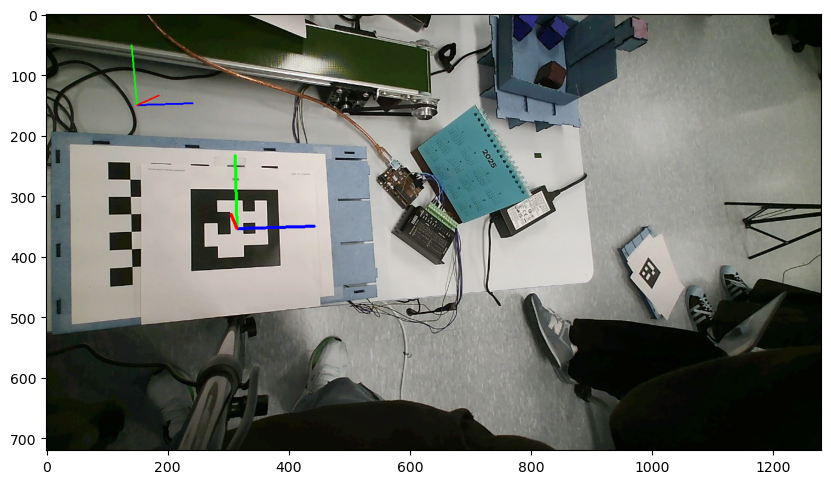

In [21]:
frame = cv2.imread('./E_ArUco/57_2.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.drawFrameAxes(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

[[6]] [array([[2.6627807 ],
       [0.03406659],
       [0.03942478]])] [[ 0.99927746  0.01732883  0.03382691]
 [ 0.03095569 -0.88746877 -0.45982706]
 [ 0.02205207  0.46054195 -0.88736397]] [array([[-0.03117545],
       [ 0.20307603],
       [ 0.54473931]])]
[[0.99927746 0.03095569 0.02205207]] [[ 0.01732883 -0.88746877  0.46054195]] [[ 0.03382691 -0.45982706 -0.88736397]]


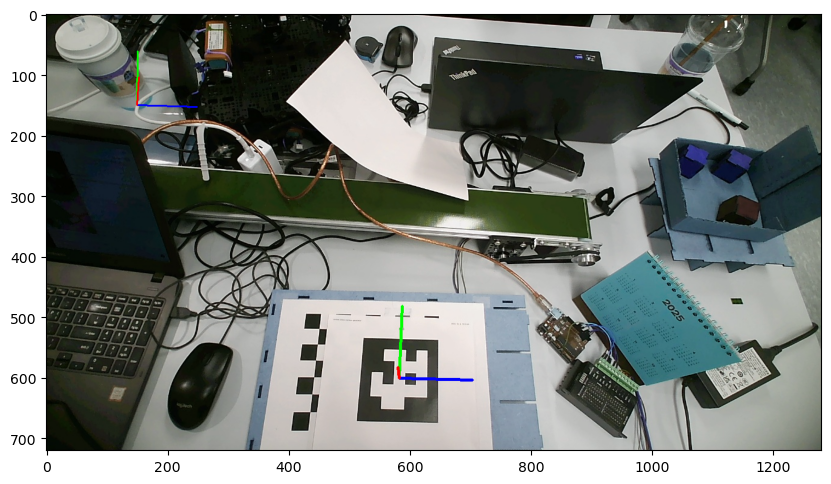

In [22]:
frame = cv2.imread('./E_ArUco/57_3.jpg')

ids1, rvecs1, R, tvecs1 = get_matrix(frame)
print(ids1, rvecs1, R, tvecs1)

cv2.drawFrameAxes(frame, k, d, rvecs1[0], tvecs1[0], 0.1)

x_T = np.dot(R, unit_x)
y_T = np.dot(R, unit_y)
z_T = np.dot(R, unit_z)

axis_size = 100
axis_center = (150, 150)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*x_T[0]), int(axis_center[1] + axis_size*x_T[1])), (0, 0, 255), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*y_T[0]), int(axis_center[1] + axis_size*y_T[1])), (0, 255, 0), 2)
cv2.line(frame, axis_center, (int(axis_center[0] + axis_size*z_T[0]), int(axis_center[1] + axis_size*z_T[1])), (255, 0, 0), 2)

print(x_T.T, y_T.T, z_T.T)

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

In [23]:
tvecs = [np.array([-0.02485963, -0.02163572,  1.37618184]), 
         np.array([ 0.16683882, -0.04118701,  1.39061362]), 
         np.array([ 0.34350367, -0.05807068,  1.32772161])]

In [24]:
rvecs = [np.array([-2.73454374,  0.15511434,  0.15228224]), 
        np.array([-2.78481578,  0.16157451,  0.04434246]),
        np.array([-2.70504533,  0.15742525, -0.05731274])]

In [25]:
len(rvecs)

3

In [26]:
R = [ cv2.Rodrigues(rvecs[i])[0] for i in range(len(rvecs))]

In [27]:
R

[array([[ 0.98793356, -0.12985785, -0.08440514],
        [-0.08678342, -0.91552958,  0.39277757],
        [-0.12828066, -0.38071318, -0.9157519 ]]),
 array([[ 0.99300726, -0.11755769, -0.01080599],
        [-0.10660554, -0.9322713 ,  0.34569564],
        [-0.0507133 , -0.3421263 , -0.93828447]]),
 array([[ 0.99270778, -0.10179664,  0.06456556],
        [-0.11948007, -0.90195736,  0.4149668 ],
        [ 0.01599315, -0.41965506, -0.90754275]])]

In [28]:
tvecs2 = [tvecs[i] - tvecs[0] for i in range(len(tvecs))]

In [29]:
tvecs2

[array([0., 0., 0.]),
 array([ 0.19169845, -0.01955129,  0.01443178]),
 array([ 0.3683633 , -0.03643496, -0.04846023])]

In [30]:
tvecs3 = [np.dot(R[0].T, tvecs2[i]) for i in range(len(tvecs2))]

In [31]:
tvecs3

[array([0., 0., 0.]),
 array([ 0.18923074, -0.01248813, -0.03707557]),
 array([ 0.37329693,  0.00397187, -0.00102504])]